In [14]:
# K-Means工具：
# KMeans(n_clusters=8, max_iter=300)
# n_clusters：聚类个数，缺省值为8 
# max_iter：执行一次k-means算法所进行的最大迭代数，缺省值为300 

from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签


# 数据加载
data = pd.read_csv(r'D:\i学习\Data_Engine_with_Python-master\L3\car_data.csv',encoding="gbk")
train_x = data[["人均GDP","城镇人口比重","交通工具消费价格指数", "百户拥有汽车量"]]

#确定最佳聚类数
#K-Means 手肘法：
# 统计不同K取值的误差平方和
# sse = []
# for k in range(1, 11):
#  # kmeans算法
#  kmeans = KMeans(n_clusters=k)
#  kmeans.fit(train_x)
#  # 计算inertia簇内误差平方和
#  sse.append(kmeans.inertia_)
# x = range(1, 11)
# plt.xlabel('K')
# plt.ylabel('SSE')
# plt.plot(x, sse, 'o-')
# plt.show()

kmeans = KMeans(n_clusters=3)
# 规范化到[0,1]空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
# 使用kmeans进行聚类
kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)
data['类别'] = predict_y
#data.sort_values(['类别'],ascending=[False])
data

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,类别
0,北京,8.05,86.20,95.92,37.71,0
1,天津,8.34,80.50,103.57,20.62,2
2,河北,3.39,45.60,99.03,23.32,1
3,山西,3.13,49.68,98.96,18.60,1
4,内蒙古,5.79,56.62,99.11,19.62,0
5,辽宁,5.07,64.05,100.12,11.15,1
6,吉林,3.84,53.40,97.15,11.24,1
7,黑龙江,3.28,56.50,100.54,5.29,1
8,上海,8.18,89.30,101.58,18.15,2
9,江苏,6.22,61.90,98.95,23.92,0


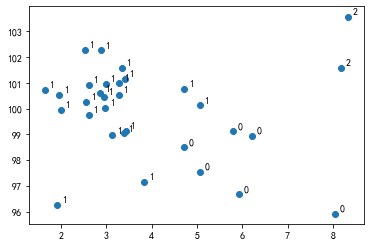

In [15]:
x = data['人均GDP']
y = data['交通工具消费价格指数']
txt = data['类别']

# print(txt)
plt.scatter(x, y)
#data.plot.scatter(x='人均GDP', y='城镇人口比重')
for i in range(len(x)):
    plt.annotate(txt[i], xy = (x[i], y[i]), xytext = (x[i]+0.1, y[i]+0.1)) # 这里xy是需要标记的坐标，xytext是对应的标签坐标
plt.show()

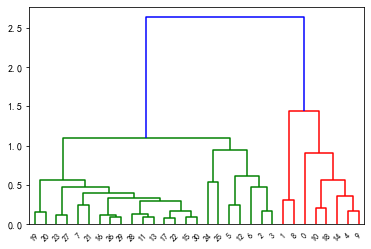

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [6]:
#层次图可视化：
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn

# 数据加载
data = pd.read_csv(r'D:\i学习\Data_Engine_with_Python-master\L3\car_data.csv',encoding="gbk")
train_x = data[["人均GDP","城镇人口比重","交通工具消费价格指数", "百户拥有汽车量"]]

# 规范化到[0,1]空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)

linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()

sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
#n_clusters：聚类簇数
#affinity：距离计算参数，默认为euclidean
#linkage： {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)